<a href="https://colab.research.google.com/github/somilasthana/MachineLearningSkills/blob/master/MiniBatchKMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
"""
The MiniBatchKMeans is a variant of the KMeans algorithm which uses mini-batches 
to reduce the computation time, while still attempting to optimise the same 
objective function. Mini-batches are subsets of the input data, randomly 
sampled in each training iteration.


In the first step,  samples are drawn randomly from the dataset, to form a 
mini-batch. These are then assigned to the nearest centroid. In the second step, 
the centroids are updated. In contrast to k-means, this is done on a per-sample basis.
"""

In [0]:
import time

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.image import extract_patches_2d
import numpy as np

In [2]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [0]:
rng = np.random.RandomState(42)

kmeans = MiniBatchKMeans(n_clusters=81, random_state=rng, verbose=True)
patch_size = (20, 20)

buffer=[]
index = 0

In [6]:
t0 = time.time()

for _ in range(6):
  for img in faces.images:
    data = extract_patches_2d(img, patch_size, max_patches=50, random_state=rng)
    data = np.reshape(data, (len(data), -1))
    buffer.append(data)
    index += 1
    if index % 10 == 0:
      data = np.concatenate(buffer, axis=0)
      data -= np.mean(data, axis=0)
      data /= np.std(data, axis=0)
      
      kmeans.partial_fit(data)
      buffer=[]
      
    if index%100 == 0:
      print('Partial fit of %4i out of %i'
                  % (index, 6 * len(faces.images)))
      
dt = time.time() - t0
print('done in %.2fs.' % dt)

Partial fit of  100 out of 2400
[MiniBatchKMeans] Reassigning 15 cluster centers.
Partial fit of  200 out of 2400
Partial fit of  300 out of 2400
Partial fit of  400 out of 2400
Partial fit of  500 out of 2400
Partial fit of  600 out of 2400
Partial fit of  700 out of 2400
Partial fit of  800 out of 2400
Partial fit of  900 out of 2400
Partial fit of 1000 out of 2400
Partial fit of 1100 out of 2400
Partial fit of 1200 out of 2400
Partial fit of 1300 out of 2400
Partial fit of 1400 out of 2400
Partial fit of 1500 out of 2400
Partial fit of 1600 out of 2400
Partial fit of 1700 out of 2400
Partial fit of 1800 out of 2400
Partial fit of 1900 out of 2400
Partial fit of 2000 out of 2400
Partial fit of 2100 out of 2400
Partial fit of 2200 out of 2400
Partial fit of 2300 out of 2400
Partial fit of 2400 out of 2400
done in 3.04s.


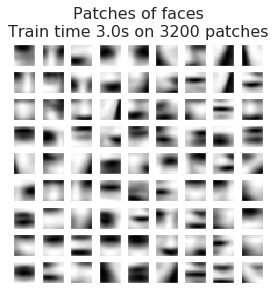

In [7]:
plt.figure(figsize=(4.2, 4))
for i, patch in enumerate(kmeans.cluster_centers_):
  plt.subplot(9, 9, i+1)
  plt.imshow(patch.reshape(patch_size), cmap=plt.cm.gray, interpolation='nearest')
  plt.xticks(())
  plt.yticks(())
  
plt.suptitle('Patches of faces\nTrain time %.1fs on %d patches' %
             (dt, 8 * len(faces.images)), fontsize=16)
plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)

plt.show()